<a href="https://colab.research.google.com/github/Tanveer132/Neural-Network/blob/main/FST_LSTM_RNN_on_multivariet_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LSTM RNN on sample data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [25]:
col_1=np.array([10,20,30,40,50,60,70,80,90])
col_2=np.array([15,25,35,45,55,65,75,85,95])


In [26]:
out=[]
for i in range (len(col_1)):
  out.append(col_1[i]+col_2[i])

out_col=np.array(out)
out_col
#out_col=col_1+col_2

array([ 25,  45,  65,  85, 105, 125, 145, 165, 185])

In [31]:
#reshape data
col_1=col_1.reshape(len(col_1),1)
col_2=col_2.reshape(len(col_2),1)
out_col=out_col.reshape(len(out_col),1)
col_1

array([[10],
       [20],
       [30],
       [40],
       [50],
       [60],
       [70],
       [80],
       [90]])

In [30]:
data=np.hstack((col_1,col_2,out_col))
data

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [18]:
#len(data)=9
#nsteps=3
def featureTransform(n_steps,data):
  x=[]
  y=[]
  for i in range(n_steps,len(data)+1):
    x.append(data[i-n_steps:i,:-1])
    y.append(data[i-1,-1])
  x,y=np.array(x),np.array(y)
  return x,y

In [19]:
n_steps=3
xtrain,ytrain=featureTransform(n_steps,data)
xtrain,xtrain.shape

(array([[[10, 15],
         [20, 25],
         [30, 35]],
 
        [[20, 25],
         [30, 35],
         [40, 45]],
 
        [[30, 35],
         [40, 45],
         [50, 55]],
 
        [[40, 45],
         [50, 55],
         [60, 65]],
 
        [[50, 55],
         [60, 65],
         [70, 75]],
 
        [[60, 65],
         [70, 75],
         [80, 85]],
 
        [[70, 75],
         [80, 85],
         [90, 95]]]), (7, 3, 2))

In [20]:
from keras.layers import LSTM
from keras.layers import Dense
from keras import Sequential

#build model
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(n_steps,xtrain.shape[2])))    #input shape= row:col
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10600     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


In [21]:
history=model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14782.7969
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 14508.3965
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 14237.5723
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 13974.8525
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 13720.4980
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 13474.4199
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13236.5459
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13007.0059
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 12785.1064
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 12569.3047
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 12357.9580
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 12149.7217
Epoch 13/100

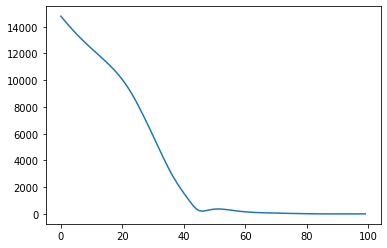

In [22]:
plt.plot(history.history['loss'])

In [23]:
#testing
xtest=np.array([[80,85],[90,95],[100,105]])
xtest=xtest.reshape(1,3,2)

In [24]:
ypred=model.predict(xtest)
ypred

array([[205.8628]], dtype=float32)